In [1]:
import plotly.offline as pyo

from plotly.graph_objs import *

import chart_studio.plotly as py

import pandas as pd
from pandas import DataFrame

In [2]:
pyo.offline.init_notebook_mode()

In [4]:
from plotly import tools

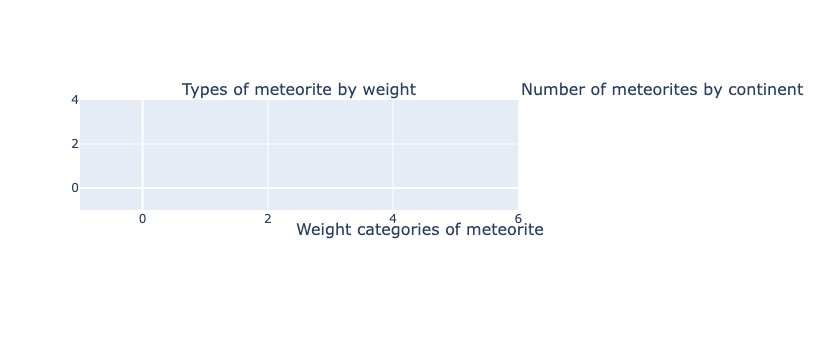

In [22]:
fig = tools.make_subplots(rows = 3, cols = 3,
                   specs = [[{'rowspan' : 2, 'colspan' : 2}, None, {'rowspan' : 2}],
                            [None, None, None],
                            [{'colspan' : 3}, None, None]],
                   subplot_titles = ["Types of meteorite by weight", 
                                     "Number of meteorites by continent",
                                     "Weight categories of meteorite",
                                    ])
fig.append_trace({'type' : 'scatter'}, row = 1, col = 1)
pyo.iplot(fig)

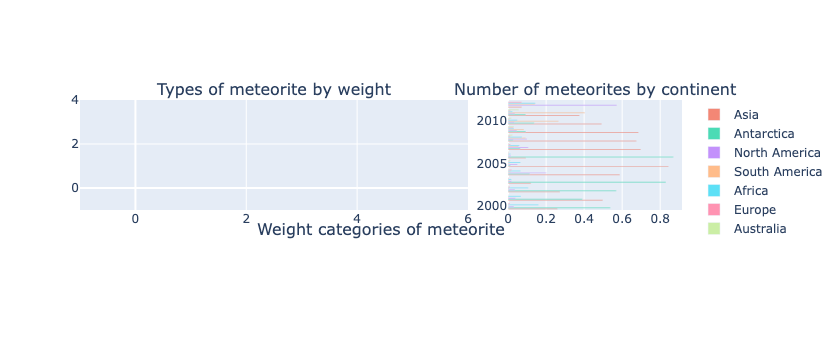

In [23]:
stacked = py.get_figure("rmuir", 241)
for d in stacked['data']:
    xVals = d['y']
    yVals = d['x']
    d.update({'orientation' : 'h',
             'x' : xVals,
             'y' : yVals})
    fig.append_trace(d, row = 1, col = 3)
    
pyo.iplot(fig)

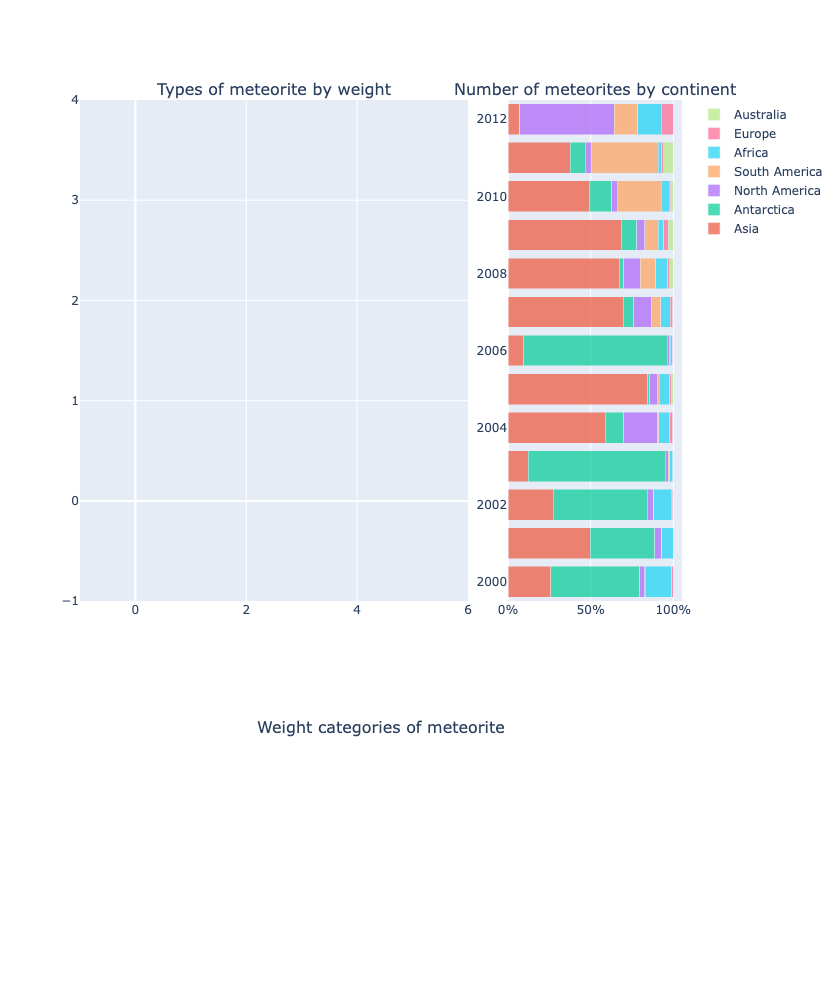

In [24]:
fig['layout']['xaxis2'].update({'tickformat' : '.0%', 'hoverformat' : '%'})
fig['layout'].update({'barmode' : 'stack', 'height' : 1000})
pyo.iplot(fig)

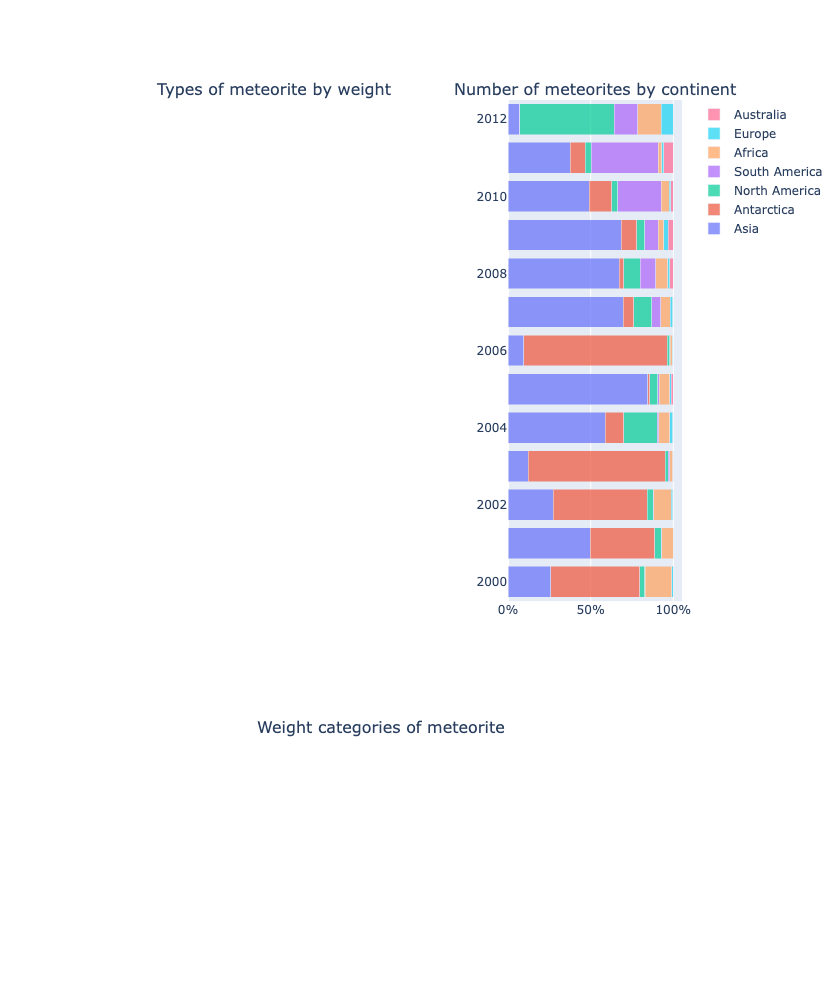

In [26]:
fig = tools.make_subplots(rows = 3, cols = 3,
                   specs = [[{'rowspan' : 2, 'colspan' : 2}, None, {'rowspan' : 2}],
                            [None, None, None],
                            [{'colspan' : 3}, None, None]],
                   subplot_titles = ["Types of meteorite by weight", 
                                     "Number of meteorites by continent",
                                     "Weight categories of meteorite",
                                    ])

stacked = py.get_figure("rmuir", 241)
for d in stacked['data']:
    xVals = d['y']
    yVals = d['x']
    d.update({'orientation' : 'h',
             'x' : xVals,
             'y' : yVals})
    fig.append_trace(d, row = 1, col = 3)
    
fig['layout']['xaxis2'].update({'tickformat' : '.0%', 'hoverformat' : '%'})

fig['layout'].update({'barmode' : 'stack', 'height' : 1000})

pyo.iplot(fig)

In [11]:
sizes = pd.read_csv(r"../Data/MeteoriteLandingsbyWeightPerYear.csv", index_col = 0)
sizes.head()

101 - 500g  501 - 1000g  less than 101g  more than 1000g
year                                                          
2000         522          137             888              232
2001         503          144             818              185
2002         497          123            1249              203
2003         555          134            2425              208
2004         394          119            1289              136

In [12]:
sizeStrings = sizes.columns.tolist()

sizes['total'] = sizes.sum(axis = 1)
for s in sizeStrings:
    sizes["{}_pc".format(s)] = sizes[s] / sizes['total']
    
sizes.head()

101 - 500g  501 - 1000g  less than 101g  more than 1000g  total  \
year                                                                    
2000         522          137             888              232   1779   
2001         503          144             818              185   1650   
2002         497          123            1249              203   2072   
2003         555          134            2425              208   3322   
2004         394          119            1289              136   1938   

      101 - 500g_pc  501 - 1000g_pc  less than 101g_pc  more than 1000g_pc  
year                                                                        
2000       0.293423        0.077010           0.499157            0.130410  
2001       0.304848        0.087273           0.495758            0.112121  
2002       0.239865        0.059363           0.602799            0.097973  
2003       0.167068        0.040337           0.729982            0.062613  
2004       0.203302        0.061404           0.665119            0.070175

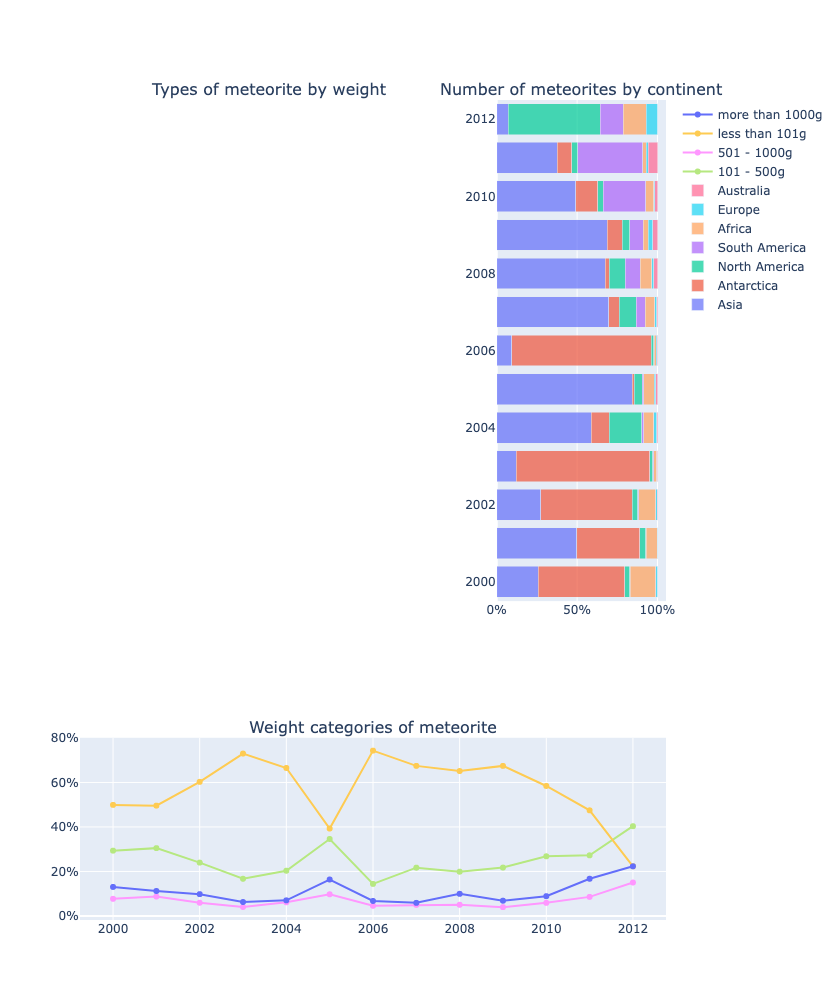

In [27]:
for s in sizeStrings:
    fig.append_trace({'type' : 'scatter',
                     'mode' : 'markers+lines',
                     'x' : sizes.index,
                     'y' : sizes["{}_pc".format(s)],
                     'name' : s},
                    row = 3, col = 1)
    
fig['layout']['yaxis3'].update({'tickformat' : '.0%', 'hoverformat' : '%'})

pyo.iplot(fig)

In [14]:
typeWeight = pd.read_csv(r"../Data/MeteoriteLandingsbyWeightAndType.csv", index_col = 0)
typeWeight.head()

wideClass  mass (g)
18        LL     700.0
22   Eucrite     252.0
30  Ureilite    3950.0
49         L    9500.0
82         H   29560.0

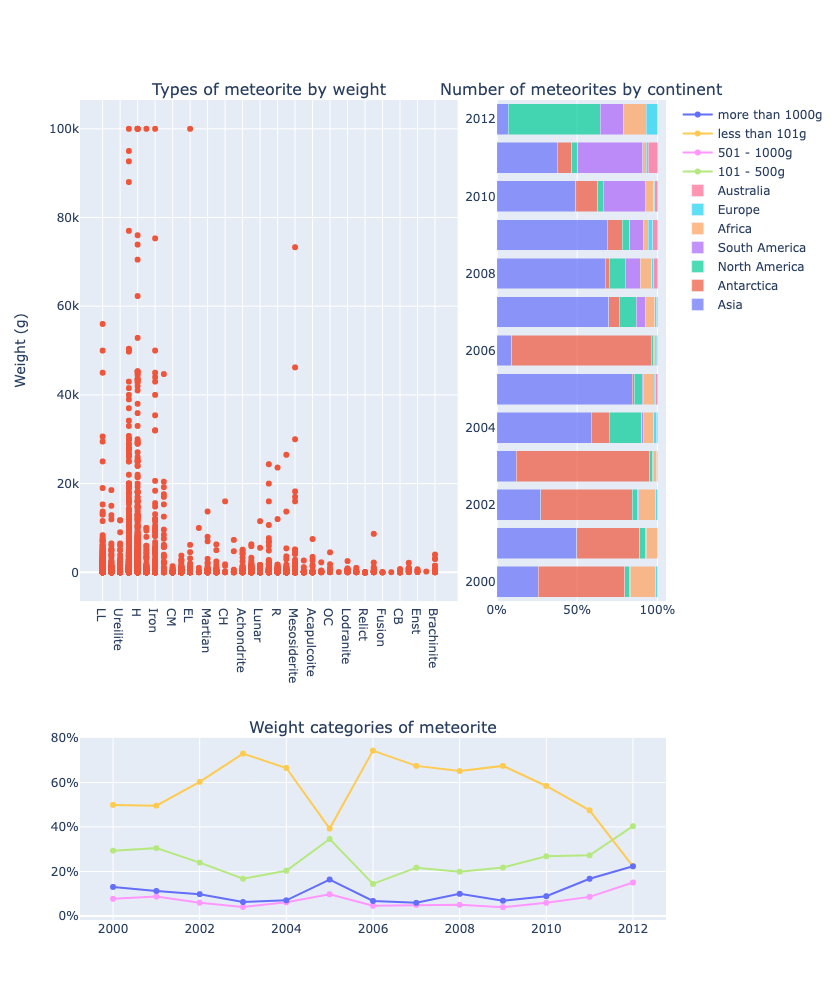

In [28]:
fig.append_trace({'type' : 'scatter',
             'mode' : "markers",
             'x' : typeWeight['wideClass'],
             'y' : typeWeight['mass (g)'],
                'showlegend' : False},
                row = 1, col = 1)

fig['layout']['yaxis1'].update({'title' : 'Weight (g)'})
fig['layout']['yaxis3'].update({'tickformat' : '.0%', 'hoverformat' : '%'})
pyo.iplot(fig)

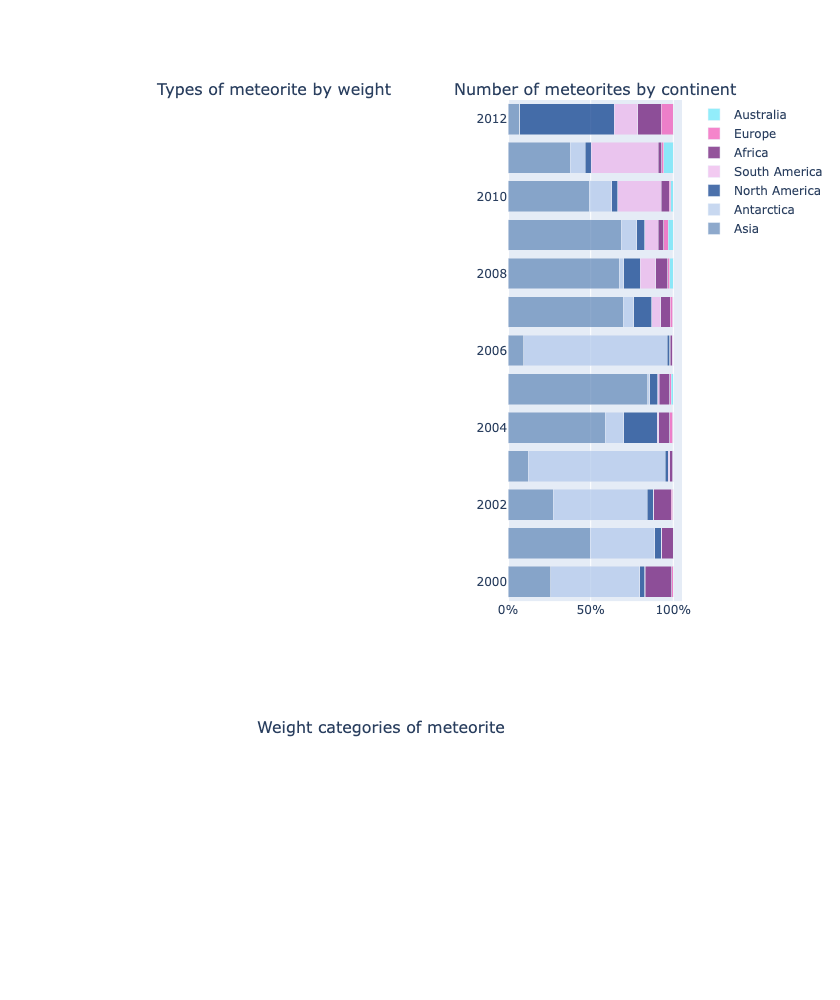

In [29]:
fig = tools.make_subplots(rows = 3, cols = 3,
                   specs = [[{'rowspan' : 2, 'colspan' : 2}, None, {'rowspan' : 2}],
                            [None, None, None],
                            [{'colspan' : 3}, None, None]],
                   subplot_titles = ["Types of meteorite by weight", 
                                     "Number of meteorites by continent",
                                     "Weight categories of meteorite",])

stackedBarColours = ["rgb(95,134,183)", "rgb(177,200,235)", "rgb(1,54,136)", 
                     "rgb(237,180,236)", "rgb(104,12,113)", "rgb(241,82,182)", 
                     "rgb(101,230,249)",]    

stacked = py.get_figure("rmuir", 241)
for i, d in enumerate(stacked['data']):
    xVals = d['y']
    yVals = d['x']
    d.update({'orientation' : 'h',
             'x' : xVals,
             'y' : yVals,
             'marker' : {'color' : stackedBarColours[i]},
             'legendgroup' : 'continents'})
    fig.append_trace(d, row = 1, col = 3)
    
fig['layout']['xaxis2'].update({'tickformat' : '.0%', 'hoverformat' : '%'})
fig['layout'].update({'barmode' : 'stack', 'height' : 1000})

pyo.iplot(fig)

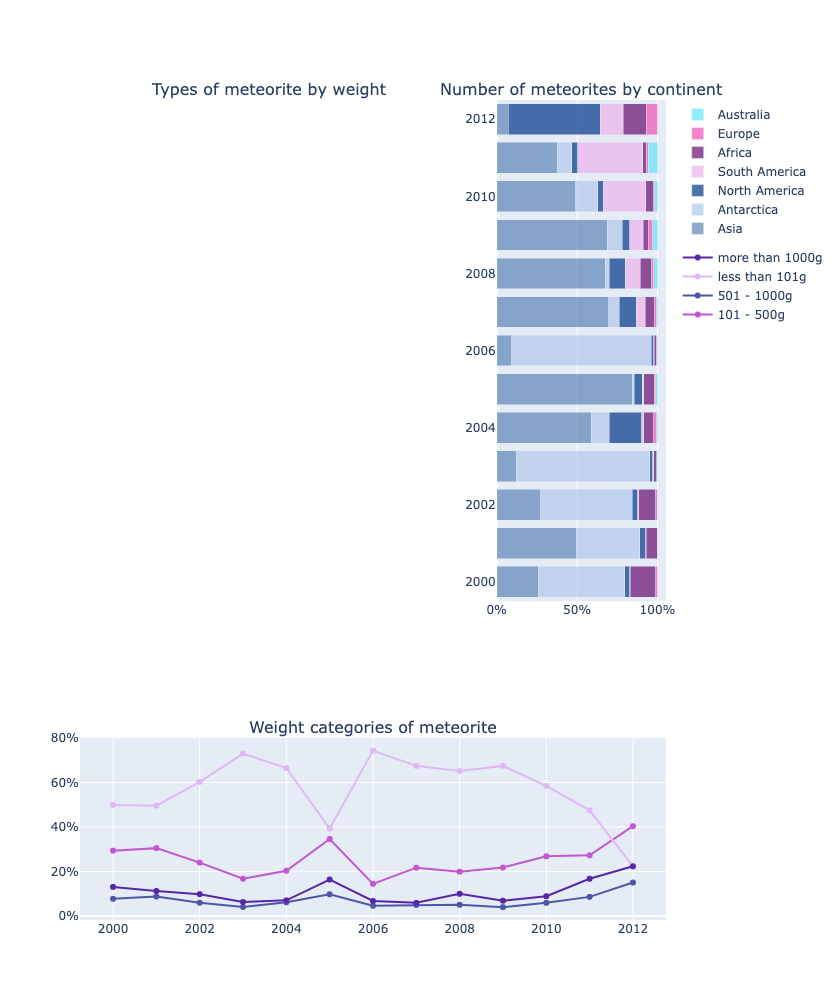

In [30]:
sizes = pd.read_csv(r"../Data/MeteoriteLandingsbyWeightPerYear.csv", index_col = 0)

sizeStrings = sizes.columns.tolist()

sizes['total'] = sizes.sum(axis = 1)
for s in sizeStrings:
    sizes["{}_pc".format(s)] = sizes[s] / sizes['total']
    
sizeColours = ["rgb(194,87,211)", "rgb(77,87,168)", "rgb(223,184,245)", "rgb(88,38,166)"]

    
for i, s in enumerate(sizeStrings):
    fig.append_trace({'type' : 'scatter',
                     'mode' : 'markers+lines',
                     'x' : sizes.index,
                     'y' : sizes["{}_pc".format(s)],
                     'name' : s,
                     'marker' : {'color' : sizeColours[i]},
                     'legendgroup' : 'weightsbyyear'},
                    row = 3, col = 1)
    
fig['layout']['yaxis3'].update({'tickformat' : '.0%', 'hoverformat' : '%'})

pyo.iplot(fig)

In [31]:
typeWeight = pd.read_csv(r"../Data/MeteoriteLandingsbyWeightAndType.csv", index_col = 0)
typeWeight.head()

wideClass  mass (g)
18        LL     700.0
22   Eucrite     252.0
30  Ureilite    3950.0
49         L    9500.0
82         H   29560.0

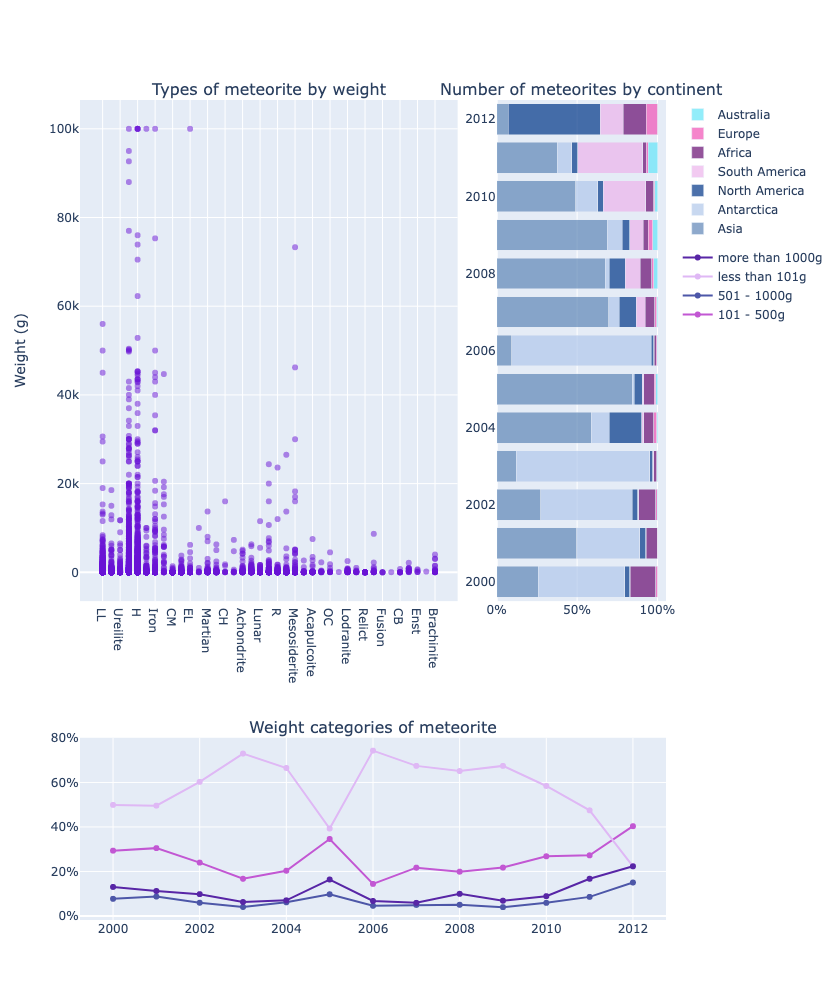

In [32]:
fig.append_trace({'type' : 'scatter',
             'mode' : "markers",
             'x' : typeWeight['wideClass'],
             'y' : typeWeight['mass (g)'],
                'showlegend' : False,                  
                 'hoverinfo' : 'x+y',
                 'marker' : {'color' : "rgba(107,20,214, 0.5)"}},
                row = 1, col = 1)

fig['layout']['yaxis1'].update({'title' : 'Weight (g)'})
pyo.iplot(fig)

In [33]:
fig['layout'].update({'hovermode' : 'closest'})

Layout({
    'annotations': [{'font': {'size': 16},
                     'showarrow': False,
                     'text': 'Types of meteorite by weight',
                     'x': 0.32222222222222224,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 1.0,
                     'yanchor': 'bottom',
                     'yref': 'paper'},
                    {'font': {'size': 16},
                     'showarrow': False,
                     'text': 'Number of meteorites by continent',
                     'x': 0.8555555555555556,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 1.0,
                     'yanchor': 'bottom',
                     'yref': 'paper'},
                    {'font': {'size': 16},
                     'showarrow': False,
                     'text': 'Weight categories of meteorite',
                     'x': 0.5,
                     'xanchor': 'center',

In [41]:
fig['layout'].update({'legend' : {'tracegroupgap' : 600}})

fig['layout'].update({'annotations': [{'font': {'color': 'grey', 'size': 10},
                      'showarrow': False,
                      'text': '<i>Source: https://data.nasa.gov/view/ak9y-cwf9</i>',
                      'x': 0.1,
                      'xref': 'paper',
                      'y': -0.1,
                      'yref': 'paper'}]})
pyo.iplot(fig)